# Lab Instructions

You are working as an analyst for a consulting agency that has been hired to study and improve productivity at a mid-sized company.  Morale is very low and, after speaking with employees, several common complaints kept coming up:

* New employees complained that more tenured employees were lazy and unproductive.
* More tenured employees complained that the newer employees didn't focus and were therefore unproductive.
* Managers were worried that remote workers might be less productive.
* In-person employees found it impossible to focus and be productive when their desk was in the open plan area.
* Many people said they had so much administrative work to do they could only be truly productive if they worked overtime.
* Everyone complained that there were too many meetings.

The consulting agency carefully collected data on a number of factors including number of years at the company, focus (higher is better), productivity (higher is better), department, meetings per week, and desk location can be found in Employee_productivity.csv.

1. Determine which feature - years at the company, hours worked, or focus - has the strongest linear relationship with productivity.  Show a visualization and calculate R-squared for all three relationships to justify your answer.

2. Build on that linear regression model to determine what other featuers also impact productivity. Using both visualzations and R-squared values, build a model that can predicts employee productivity at this company. Evaluate each feature in the dataset.

3. Write a short (a few sentences) summary of how the different factors in the data relate to employee productivity.  What recommendations would you make so that employees can be as productive as possible?

**For the purposes of this lab you MUST use the model building techniques we covered in class.  Failure to do so will automatically result in a 20 point deduction.  I really want you to think about what you are doing and not just paste what you get from ChatGPT (which will often NOT do the correct thing by default).**



In [29]:
#%pip install statsmodels
import statsmodels.api as sm
import plotly.express as px
import plotly.io as pio

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

productivity_df = pd.read_csv('Employee_productivity.csv')

productivity_df.head()

,HoursWorked,FocusScore,ProductivityScore,Department,YearsAtCompany,TeamMeetingsPerWeek,DeskLocation
0,42.4,6.3,3127.96,Engineering,17,0,Open Plan
1,34.0,7.2,4742.60,HR,8,6,Private Office
2,47.2,5.6,2044.73,Sales,15,3,Remote
3,38.4,9.0,5818.92,HR,5,6,Private Office
4,36.4,2.5,1841.31,Sales,9,6,Remote


In [30]:
productivity_df.tail()

,HoursWorked,FocusScore,ProductivityScore,Department,YearsAtCompany,TeamMeetingsPerWeek,DeskLocation
295,46.7,7.8,4034.56,Engineering,3,1,Private Office
296,39.7,3.6,1131.78,Sales,13,5,Private Office
297,38.2,3.7,1983.32,HR,1,3,Private Office
298,32.2,8.2,3409.50,Sales,14,1,Open Plan
299,38.4,9.0,5903.01,Sales,19,4,Private Office


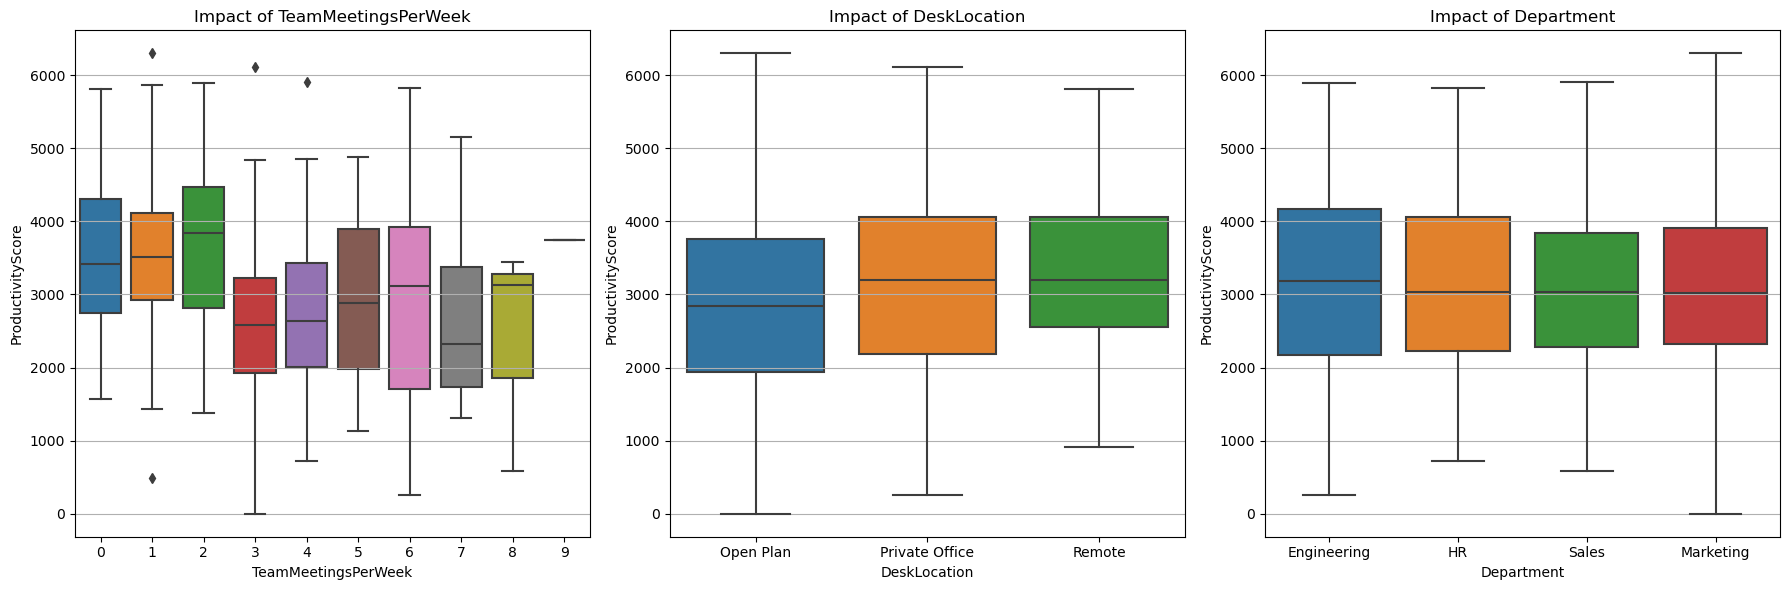

In [31]:
other_features = ['TeamMeetingsPerWeek', 'DeskLocation', 'Department']

plt.figure(figsize=(18, 6))

for i, feature in enumerate(other_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=feature, y='ProductivityScore', data=productivity_df)
    plt.title(f'Impact of {feature}')
    plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

Average Focus Scores by Desk Location:
DeskLocation
Open Plan         5.374757
Private Office    6.277570
Remote            6.588889
Name: FocusScore, dtype: float64
------------------------------


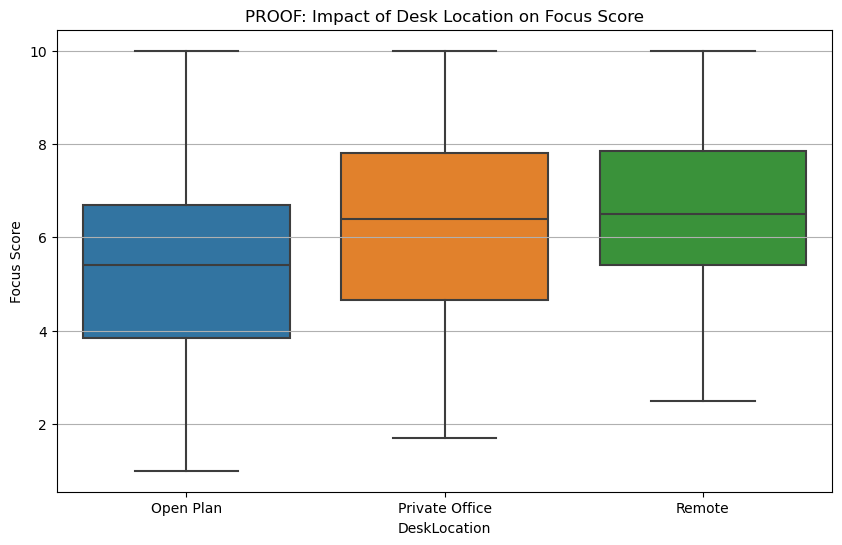

In [32]:
# 1. Calculate the exact average Focus Score for each Desk Location
mean_focus = productivity_df.groupby('DeskLocation')['FocusScore'].mean()
print("Average Focus Scores by Desk Location:")
print(mean_focus)
print("-" * 30)

# 2. Visualize the distribution to see if the drop is consistent
plt.figure(figsize=(10, 6))
sns.boxplot(x='DeskLocation', y='FocusScore', data=productivity_df, 
            order=['Open Plan', 'Private Office', 'Remote']) # Ordering for easy comparison

plt.title('PROOF: Impact of Desk Location on Focus Score')
plt.ylabel('Focus Score')
plt.grid(True, axis='y')
plt.show()

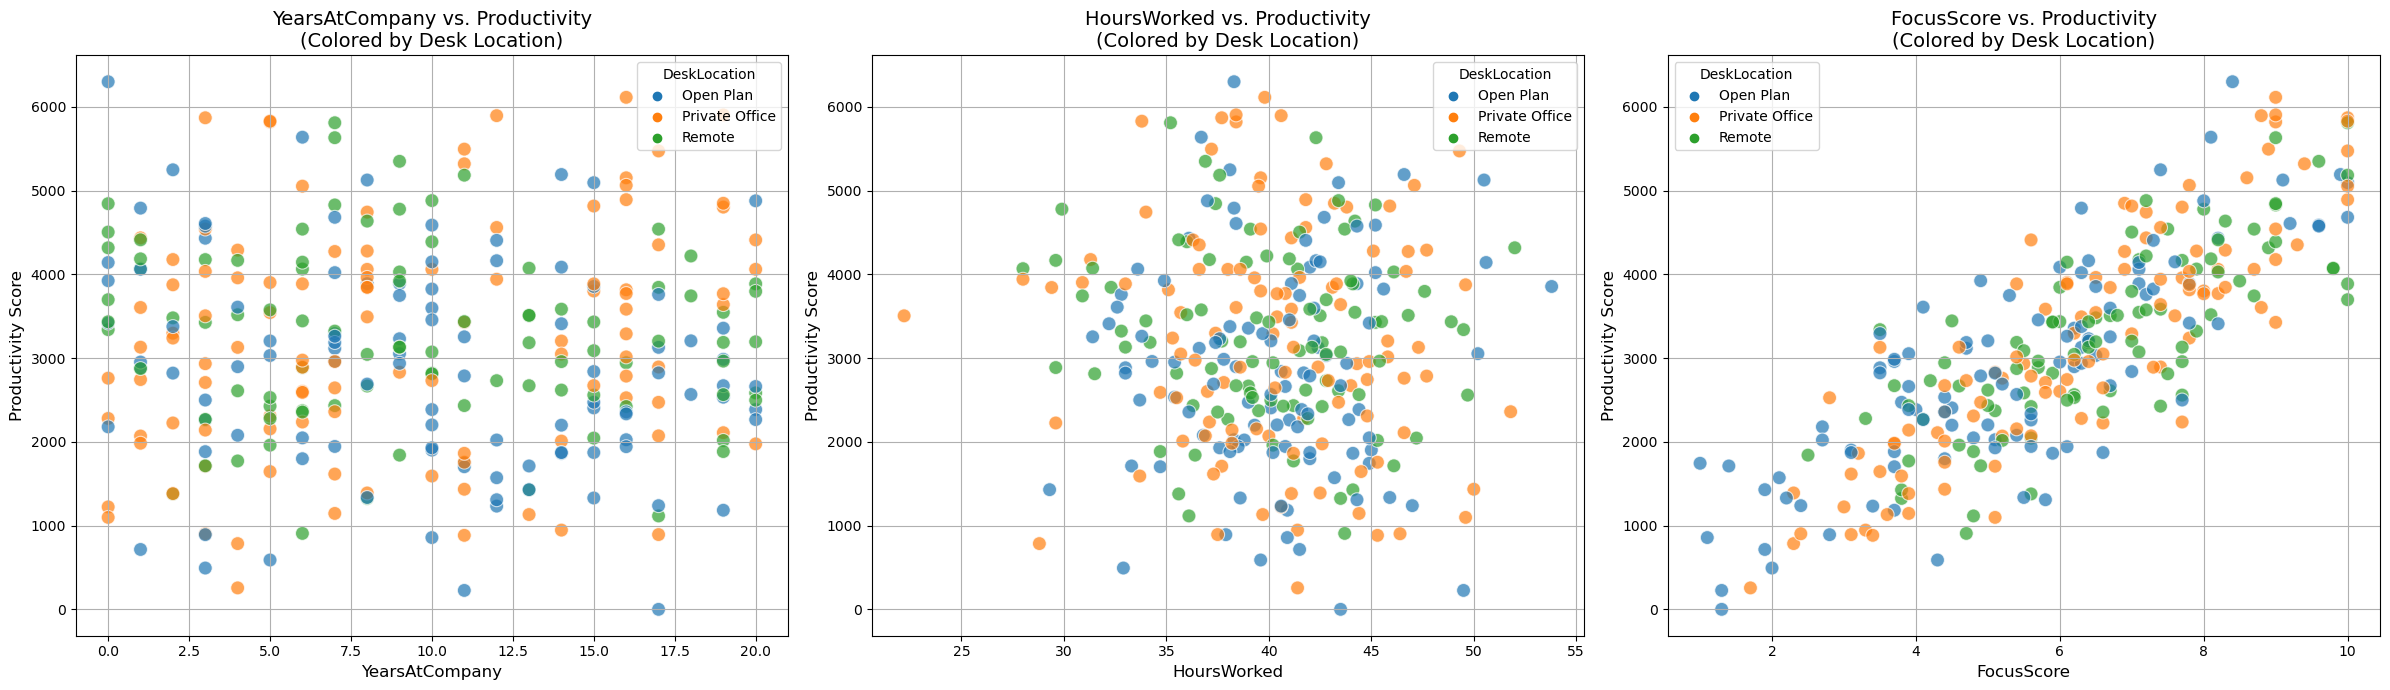

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(24, 7))

# List of the 3 features to plot
features = ['YearsAtCompany', 'HoursWorked', 'FocusScore']

for i, feature in enumerate(features):
    # Create the scatter plot
    # x = The Feature
    # y = Productivity Score
    # hue = Desk Location (Colors the dots to show the "Root Cause")
    sns.scatterplot(data=productivity_df, x=feature, y='ProductivityScore', hue='DeskLocation', ax=axes[i], s=100, alpha=0.7)
    
    # Add titles and labels
    axes[i].set_title(f'{feature} vs. Productivity\n(Colored by Desk Location)', fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('Productivity Score', fontsize=12)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

# Q1

FocusScore: R-squared = 0.6777


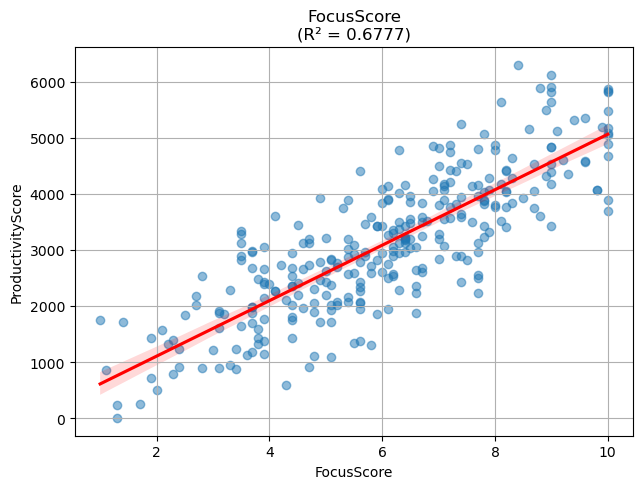

In [34]:
quant_features = ['FocusScore']
target = 'ProductivityScore'

plt.figure(figsize=(18, 5))

for i, feature in enumerate(quant_features):
    plt.subplot(1, 3, i+1)
    
    # Define X and y for the model
    X = productivity_df[[feature]]
    y = productivity_df[target]
    
    # Fit Linear Regression Model to calculate R-squared
    model = LinearRegression()
    model.fit(X, y)
    r2 = r2_score(y, model.predict(X))
    
    # Print the score to the console
    print(f"{feature}: R-squared = {r2:.4f}")
    
    # Visualize with a Regression Plot (The standard for linear relationships)
    sns.regplot(x=feature, y=target, data=productivity_df, 
                scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
    plt.title(f'{feature}\n(R² = {r2:.4f})')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Q2

In [35]:
X = productivity_df[['FocusScore', 'HoursWorked', 'YearsAtCompany', 'TeamMeetingsPerWeek']]

# 2. Convert categorical variables (Desk & Dept) into numeric "dummy" variables
# drop_first=True avoids multicollinearity (e.g., if it's not Sales or HR, it must be Engineering)
X = pd.concat([X, pd.get_dummies(productivity_df['DeskLocation'], prefix='Desk', drop_first=True)], axis=1)
X = pd.concat([X, pd.get_dummies(productivity_df['Department'], prefix='Dept', drop_first=True)], axis=1)

# 3. Define the Target
y = productivity_df['ProductivityScore']

# 4. Add a constant (intercept) - required for statsmodels
X = sm.add_constant(X.astype(float))

# 5. Fit the Model and Print the Summary
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ProductivityScore   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     70.11
Date:                Mon, 26 Jan 2026   Prob (F-statistic):           1.53e-67
Time:                        14:06:02   Log-Likelihood:                -2390.8
No. Observations:                 300   AIC:                             4802.
Df Residuals:                     290   BIC:                             4839.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 255.7046    399.258      0.640      0.522    -530.105    1041.515
FocusScore            512.7193     21.748     23.575      0.000     469.915     555.523
HoursWorked            -4.6642      8.541     -0.546      0.585     -21.474      12.146
YearsAtCompany          3.4008      6.992      0.486      0.627     -10.360      17.162
TeamMeetingsPerWeek    27.1706     24.914      1.091      0.276     -21.864      76.206
Desk_Private Office  -103.4120    100.491     -1.029      0.304    -301.197      94.373
Desk_Remote          -229.7530    106.847     -2.150      0.032    -440.047     -19.459
Dept_HR               -93.3984    115.183     -0.811      0.418    -320.100     133.303
Dept_Marketing       -136.2405    118.380     -1.151      0.251    -369.234      96.753
Dept_Sales            -49.8174    117.871     -0.423      0.673    -281.809     182.174
==============================================================================
Omnibus:                        0.168   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.920   Jarque-Bera (JB):                0.295
Skew:                           0.024   Prob(JB):                        0.863
Kurtosis:                       2.854   Cond. No.                         412.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Q3

Our analysis determined that Focus Score is the single strongest predictor of employee productivity. However, the multivariate model reveals that Team Meetings have a statistically significant negative impact on output. Three or more meetings per week significantly impacts the average productivty score for all employees. Open Plan 'Desk Location' generally leads to a lower focus score than private desk or working remotely. Tenure with the company shows to have little correlation to productivity score as both new and long term employees have widely varying scores, which given the data continues to support the conclusion that low moral is a management issue. I would recommend capping meetings per week to 5 at most, and giving employees that show improving but low productivty scores the option of working remotely.